# Argosim tutorial - Part 2

In this tutorial we will explore the `uv_track_multiband` function.

In [1]:
# Import the uv_track_multiband function from the argosim.antenna_utils module
from argosim import antenna_utils

In [2]:
# Display help on the uv_track_multiband function
help(antenna_utils.uv_track_multiband)

Help on function uv_track_multiband in module argosim.antenna_utils:

uv_track_multiband(b_ENU, lat=0.6108652381980153, dec=0.6108652381980153, track_time=0.0, t_0=0.0, n_times=1, f=1420000000.0, df=0.0, n_freqs=1, multi_band=False)
    Uv track multiband (JAX version).

    Function to compute the uv sampling baselines for a given observation time and frequency range.

    Parameters
    ----------
    b_ENU : np.ndarray
        The baselines in ENU coordinates.
    lat : float
        The latitude of the antenna array in radians.
    dec : float
        The declination of the source in radians.
    track_time : float
        The duration of the tracking in hours.
    t_0 : float
        The initial tracking time in hours.
    n_times : int
        The number of time steps.
    f : float
        The central frequency of the observation in Hz.
    df : float
        The frequency range of the observation in Hz.
    n_freqs : int
        The number of frequency samples.
    multi_band :

Which are the inputs and outputs of the function? What are the default values and in which units the inputs are expressed?

...

Group the inputs of the function in the following categories: 
- Related to the physical antenna array:
- Related to the observed source:
- Related to the observation parameters:

What does the function return? How are the outputs related to the inputs?

...

### Array location

Run the cell below and explain what the resulting figure represents.

...


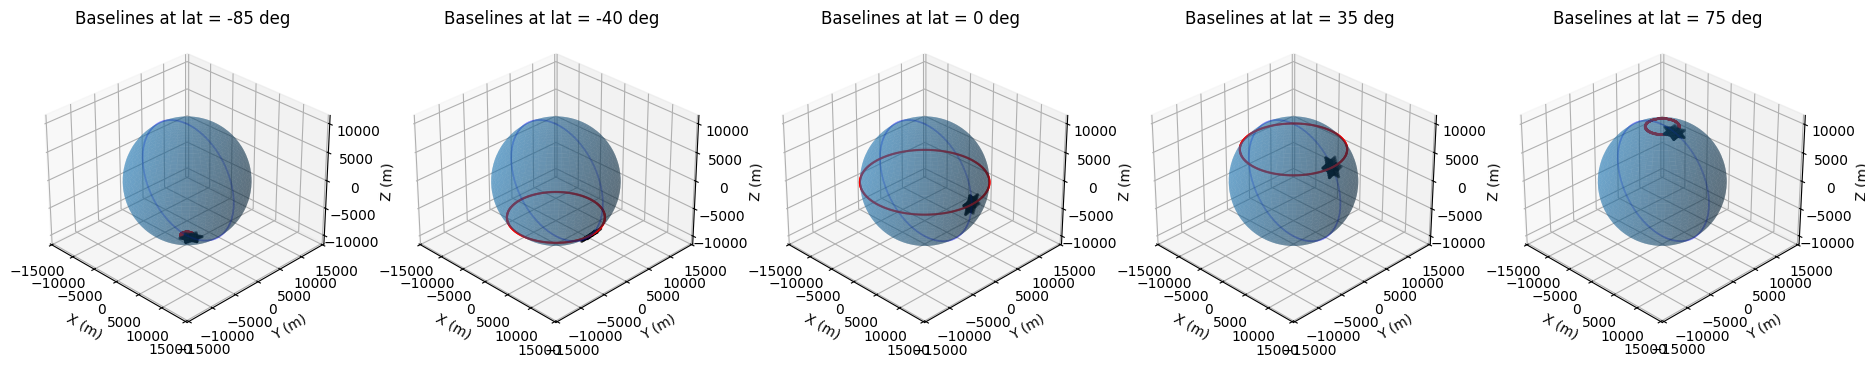

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from argosim.antenna_utils import *

array_y = y_antenna_arr(n_antenna=3, r=1000, alpha=13)
array_rand = random_antenna_arr(n_antenna=3, E_lim=250, N_lim=100, U_lim=0)
array_comby = combine_antenna_arr(array_y,array_rand)
b_ENU = get_baselines(array_comby)

fig, ax = plt.subplots(1, 5, figsize=(23, 6), subplot_kw={'projection': '3d'})
l = np.linspace(0, 2 * np.pi, 1000) 
m = np.linspace(0, np.pi, 1000)
R = 10000
x_globe = R * np.outer(np.cos(l), np.sin(m))
y_globe = R * np.outer(np.sin(l), np.sin(m))
z_globe = R * np.outer(np.ones(np.size(l)), np.cos(m))

for i, lat in enumerate([-85, -40, 0, 35, 75]):
    ax[i].plot_surface(x_globe, y_globe, z_globe, alpha=0.4)
    x_shift = R * np.cos(lat/180*np.pi)
    z_shift = R * np.sin(lat/180*np.pi)
    z_circ = np.where((z_globe[0] - z_shift)**2 < 20**2)
    y_circ = np.where((z_globe[0])**2 < 20**2)
    ax[i].scatter(x_globe[:,z_circ], y_globe[:,z_circ], z_globe[:,z_circ], c='r', s=0.3, alpha=0.2)
    ax[i].scatter(x_globe[:,y_circ], z_globe[:,y_circ], y_globe[:,y_circ] , c='b', s=0.1, alpha=0.05)
    X, Y, Z = ENU_to_XYZ(b_ENU, lat = lat/180*np.pi)

    ax[i].scatter(X + x_shift, Y, Z + z_shift, c='k', s=2)
    ax[i].set_xlabel('X (m)')
    ax[i].set_ylabel('Y (m)')
    ax[i].set_zlabel('Z (m)')
    ax[i].set_title('Baselines at lat = {} deg'.format(lat))
    ax[i].axis('equal')
    # Set up view angle
    ax[i].view_init(elev=30, azim=-45)
plt.show()

What do the numbers we iterate over ([-85, -40, 0, 35, 75]) represent?

...


How would this impact the observation?

...

### Source tracking

We will create a radio array and simulate the uv-tracks for different observation strategies.

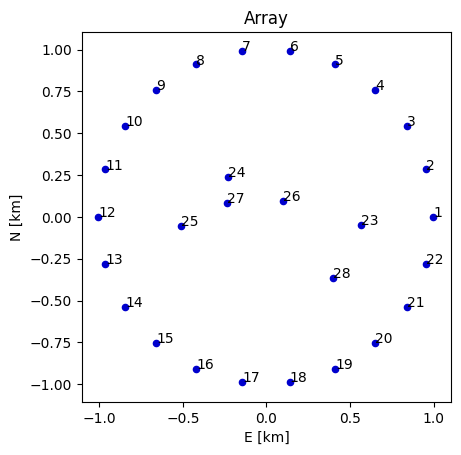

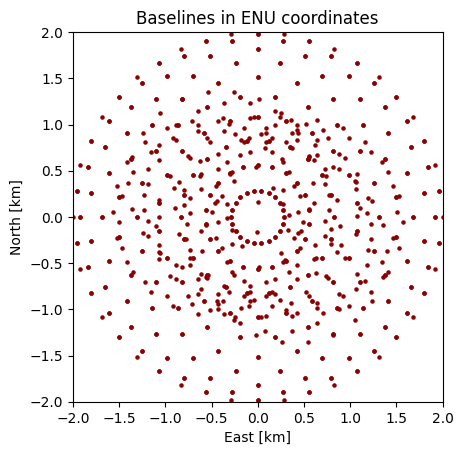

In [13]:
# Create a circular array of 22 antennas with a radius of 1000 m 
# and add 6 antennas randomly distributed inside the circle.
array_circ = circular_antenna_arr(n_antenna=22, r=1000)
array_rand = random_antenna_arr(n_antenna=6, E_lim=2e3/np.sqrt(2))
# Combine the circular and random arrays
array_comb = combine_antenna_arr(array_circ, array_rand)
# Display the antenna array in ENU coordinates
from argosim import plot_utils
plot_utils.plot_antenna_arr(array_comb)

# Compute the baselines (in ENU coordinates)
b_ENU = get_baselines(array_comb)

# Plot the baselines in ENU coordinates. 
plot_utils.plot_baselines(b_ENU, ENU=True, title='Baselines in ENU coordinates')

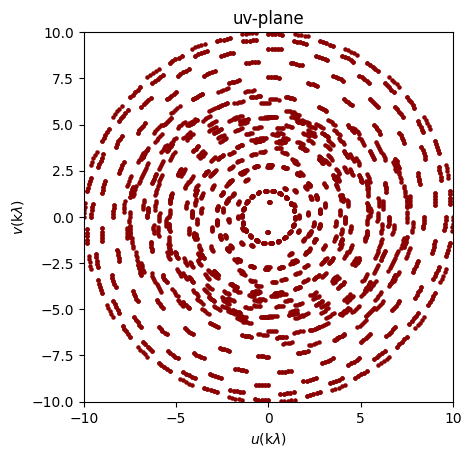

In [14]:
# Define the array latitude as if it was placed in Buenos Aires.
latitude = -34.61 * np.pi / 180  # Convert degrees to radians

# Define the source declination for a source at zenith.
declination = latitude

# Set up the observation parameters:
# - We will observe the source for 30 minutes.
# - We will start observing when the source is right above the array.
# - The data will be collected every 6 minutes.
# - We observe at 1.5 GHz (single frequency).
track_time = 0.5 # in hours
t_0 = 0  # Start time in hours
n_times = int(track_time * 60 / 6)  # Number of times (every 6 minutes)
f = 1.5e9  # Frequency in Hz (1.5 GHz)

# Compute the uv-tracks
track, _  = antenna_utils.uv_track_multiband(
    b_ENU=b_ENU,
    lat= latitude,
    dec= declination,
    track_time= track_time,
    t_0= t_0,
    n_times= n_times,
    f= f
)

# Plot the uv-tracks
plot_utils.plot_baselines(track)

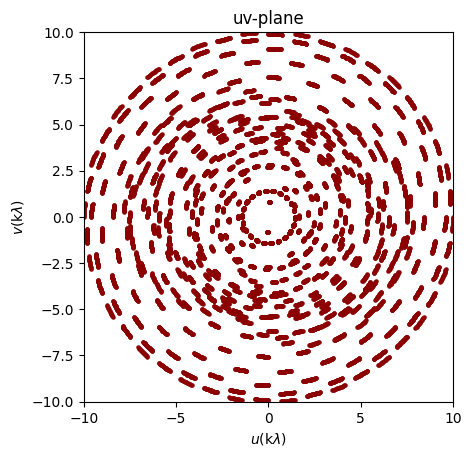

In [17]:
# Now the array will collect data every 2 minute. 
track_time = 0.5 # in hours
t_0 = 0  # Start time in hours
n_times = int(track_time * 60 / 2)  # Number of times (every 2 minutes)
f = 1.5e9  # Frequency in Hz (1.5 GHz)

# Compute the uv-tracks
track, _  = antenna_utils.uv_track_multiband(
    b_ENU=b_ENU,
    lat= latitude,
    dec= declination,
    track_time= track_time,
    t_0= t_0,
    n_times= n_times,
    f= f
)

# Plot the uv-tracks
plot_utils.plot_baselines(track)

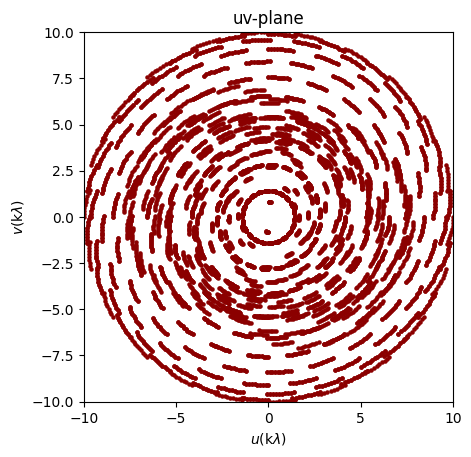

In [19]:
# Now we will observe for 1 hour. Compute the uv-tracks and plot them.
track_time = 1 # in hours
t_0 = 0  # Start time in hours
n_times = int(track_time * 60 / 6)  # Number of times (every 6 minutes)
f = 1.5e9  # Frequency in Hz (1.5 GHz)

# Compute the uv-tracks
track, _  = antenna_utils.uv_track_multiband(
    b_ENU=b_ENU,
    lat= latitude,
    dec= declination,
    track_time= track_time,
    t_0= t_0,
    n_times= n_times,
    f= f
)

# Plot the uv-tracks
plot_utils.plot_baselines(track)

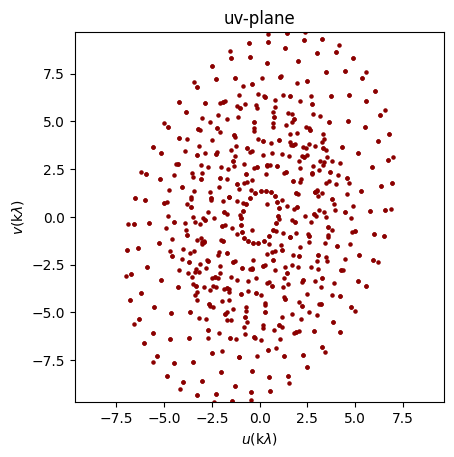

In [24]:
# Get only one snapshot ov the uv-tracks (n_times=1, track_time=0)
track_time = 0.0 # in hours
t_0 = 4  # Start time in hours
n_times = 1 
f = 1.5e9  # Frequency in Hz (1.5 GHz)

# Compute the uv-tracks
track, _  = antenna_utils.uv_track_multiband(
    b_ENU=b_ENU,
    lat= latitude,
    dec= declination,
    track_time= track_time,
    t_0= t_0,
    n_times= n_times,
    f= f
)

# Plot the uv-tracks
plot_utils.plot_baselines(track)

# Change the starting time and see how the uv-tracks change.


Describe how the uv-samples change when observing a source at different times. 

...

How does observing for longer periods will affect the uv-samples? 
...

Would you expect the uv-samples to be more or less dense? 
...

How would this affect the observation?
...

### Multifrequency observation

We will stick to one time sample and observe at multiple 
frequencies.

NOTE: we won't split the uv samples in different bands, hence we will set up the `multi_band` parameter to its default value (`False`).

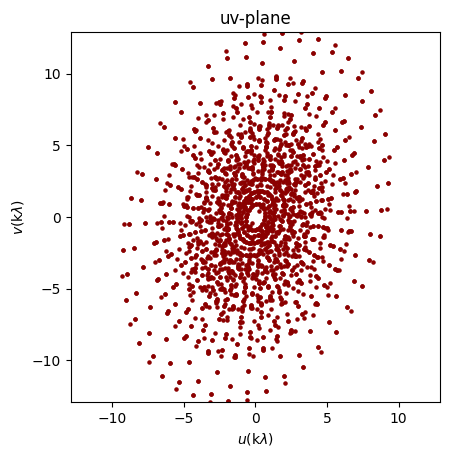

In [25]:
# Get only one snapshot of the uv-tracks (n_times=1, track_time=0) with the new starting time.
# Set up the central frequency to 1.5 GHz, a bandwidth of 1 GHz and 3 frequency channels.
track_time = 0.0 # in hours
t_0 = 4  # Start time in hours
n_times = 1 # Snapshot
f = 1.5e9  # Frequency in Hz (1.5 GHz)
df = 1e9  # Bandwidth in Hz (1 GHz)
n_freqs = 3 # Number of frequency channels


# Compute the uv-tracks
track, _  = antenna_utils.uv_track_multiband(
    b_ENU=b_ENU,
    lat= latitude,
    dec= declination,
    track_time= track_time,
    t_0= t_0,
    n_times= n_times,
    f= f,
    df=df,
    n_freqs=n_freqs
)

plot_utils.plot_baselines(track)


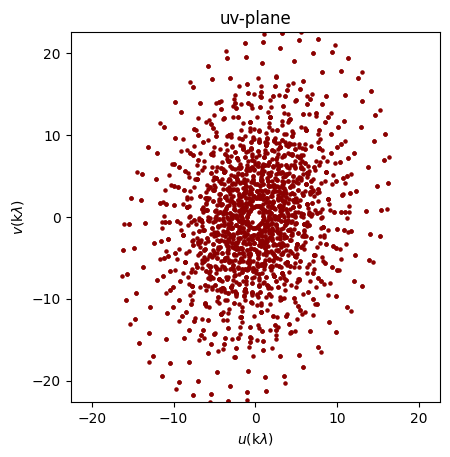

In [26]:
# Now increase the bandwith to 2 GHz. You will need to increase the central frequency. 
track_time = 0.0 # in hours
t_0 = 4  # Start time in hours
n_times = 1 # Snapshot
f = 2.5e9  # Frequency in Hz (2.5 GHz)
df = 2e9  # Bandwidth in Hz (2 GHz)
n_freqs = 3 # Number of frequency channels


# Compute the uv-tracks
track, _  = antenna_utils.uv_track_multiband(
    b_ENU=b_ENU,
    lat= latitude,
    dec= declination,
    track_time= track_time,
    t_0= t_0,
    n_times= n_times,
    f= f,
    df=df,
    n_freqs=n_freqs
)

plot_utils.plot_baselines(track)

Describe the difference with respect to the previous case.

In [ ]:
# Now add 2 more frequency channels.

# Compute the uv-tracks and plot them.
...

Describe the effect of observing at multiple frequencies, and how this can be used to improve the observation.

### Source tracking and multifrequency observation

We will now combine the two previous cases.

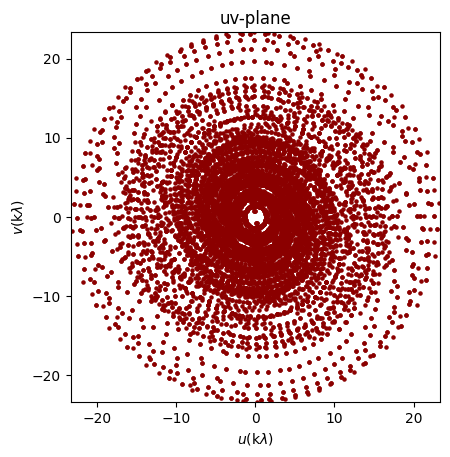

In [27]:
# Propose an observation strategy where we have multiple time steps and multiple frequency channels.
track_time = 1.5 # in hours
t_0 = -2  # Start time in hours
n_times = 4 # Snapshot
f = 2.5e9  # Frequency in Hz (2.5 GHz)
df = 2e9  # Bandwidth in Hz (2 GHz)
n_freqs = 3 # Number of frequency channels


# Compute the uv-tracks
track, _  = antenna_utils.uv_track_multiband(
    b_ENU=b_ENU,
    lat= latitude,
    dec= declination,
    track_time= track_time,
    t_0= t_0,
    n_times= n_times,
    f= f,
    df=df,
    n_freqs=n_freqs
)

plot_utils.plot_baselines(track)